Use Decision Tree Classifier to predict if a person will survive in Titanic Disaster or not

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.shape

(891, 12)

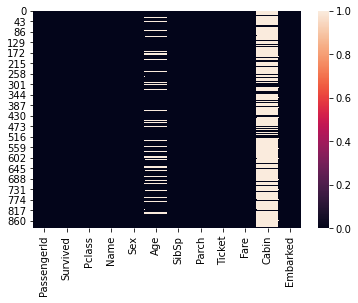

In [5]:
sns.heatmap(df.isnull())
plt.show()

In [6]:
print('% of null values in Age column')
df['Age'].isnull().sum()*100/df.shape[0]

% of null values in Age column


19.865319865319865

In [7]:
#replace with mean
m=np.round(df['Age'].mean())
print('Mean : ',m)
df['Age']=df['Age'].fillna(m)

Mean :  30.0


In [8]:
print('% of null values in Cabin column')
df['Cabin'].isnull().sum()*100/df.shape[0]

% of null values in Cabin column


77.10437710437711

In [9]:
#77% values are null so we remove column
df.drop('Cabin',axis=1,inplace=True)

In [10]:
#2 null values in Embarked column
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
#S has maximum no.of occurence
#so replace null values with S
df['Embarked'].fillna('S',inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
#there are no null values present
#let check for data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [15]:
#as name and ticket number column is not so important so we remove that column
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [17]:
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
df['Sex']=obj.fit_transform(df['Sex'])
df['Embarked']=obj.fit_transform(df['Embarked'])

In [18]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


In [20]:
#select input and output variable
X=df.drop('Survived',axis=1)
Y=df['Survived']

In [21]:
#spliting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [22]:
def create_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))
    print('Confusion Matrix')
    print(confusion_matrix(y_test,y_pred))
    return model

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
#baseline model
#create object of DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [25]:
#callfunction
dtc=create_model(dtc)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       153
           1       0.75      0.66      0.70       115

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

Confusion Matrix
[[127  26]
 [ 39  76]]


In [26]:
dtc.feature_importances_

array([0.18755187, 0.10560546, 0.32100818, 0.18208455, 0.04869859,
       0.01301875, 0.10256233, 0.03947028])

In [27]:
X.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

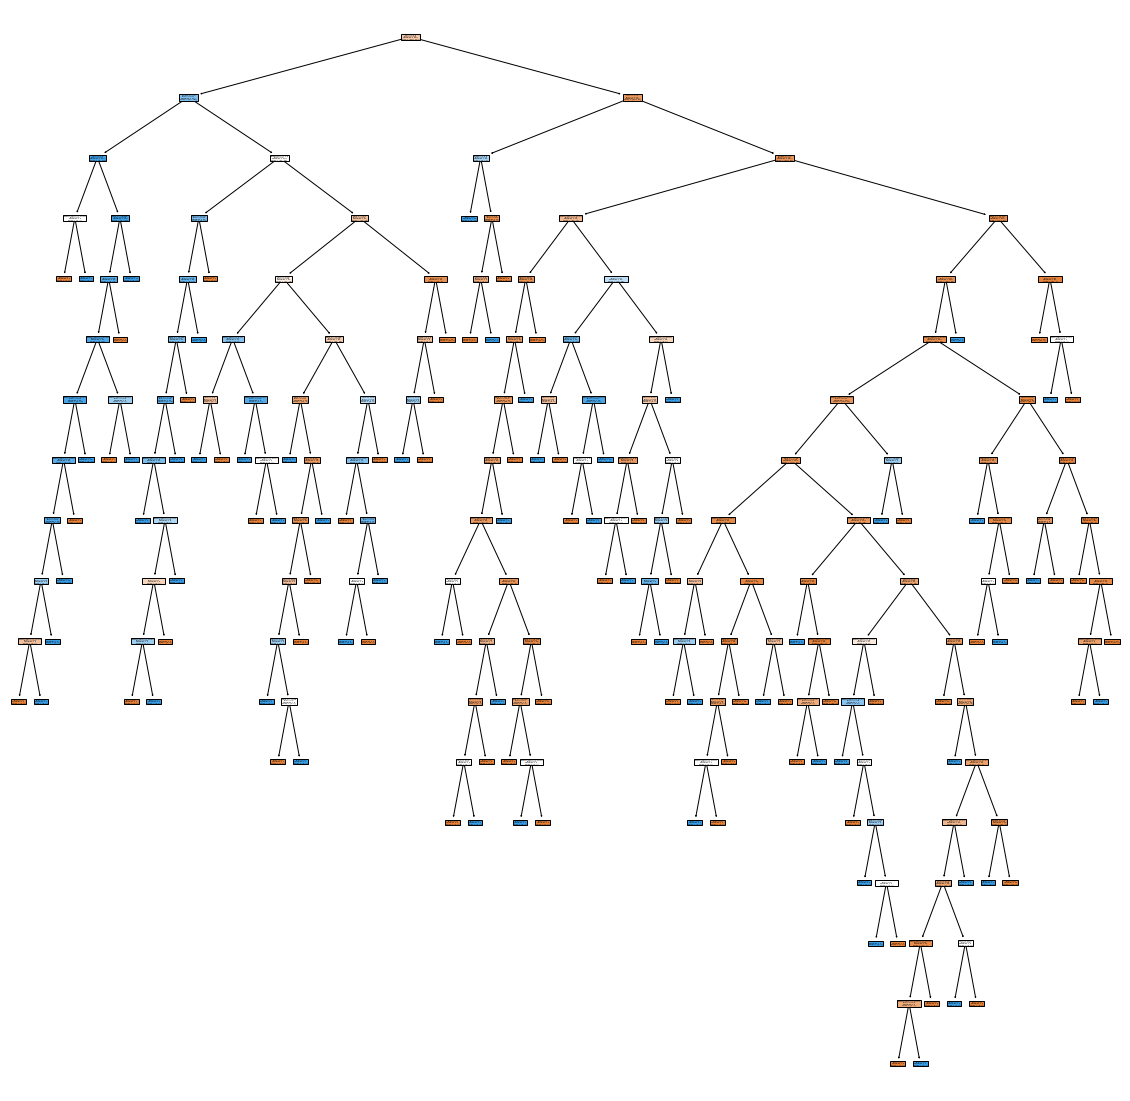

In [29]:
#create the tree 
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20)) 
_=tree.plot_tree(dtc,feature_names=features,filled=True)